In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('..\spreadsheet_data\i16WB_filtered.csv')
# Filter out slabs that were replaced during time period
df = df[df['Replaced'].notnull() == False]
df = df[df['Replaced and Broken'].notnull() == False]
df = df[df['2014'] != 'R']

df = df.drop(columns=['Replaced', 'Replaced and Broken', 'Interstate', 'Direction', 'Year Replaced', 'Possibly OR'])


df.head()

,MP From,MP To,2014 Slab ID,BY Length (ft),2014,2015,2016,2017,2018
0,22.000000,21.997566,3,12.85,NC,NC,NC,NC,NC
1,21.997566,21.994286,4,17.32,NC,NC,NC,NC,NC
2,21.994286,21.991244,5,16.06,NC,NC,NC,NC,NC
3,21.991244,21.987169,6,21.52,NC,NC,NC,NC,NC
4,21.987169,21.982809,7,23.02,NC,NC,NC,NC,NC


In [35]:
# Construct frequency table for each year
freq = {}
for year in range(2014, 2019):
    freq[year] = pd.crosstab(df[str(year)], 'count')

#Create two way frequency table
two_way_freq = pd.concat([freq[2014], freq[2015], freq[2016], freq[2017], freq[2018]], axis=1)
two_way_freq.columns = ['2014', '2015', '2016', '2017', '2018']
two_way_freq = two_way_freq.reindex(['NC', 'L1', 'T1', 'L2', 'T2', 'CC', 'SS'])
# display(rel_freq[2014])
# display(rel_freq[2015])
# display(rel_freq[2016])
# display(rel_freq[2017])
# display(rel_freq[2018])
display(two_way_freq)

,2014,2015,2016,2017,2018
NC,2189,2099,2023,1936,1886
L1,95,91,80,81,54
T1,20,25,36,47,29
L2,110,117,130,135,146
T2,147,181,215,245,283
CC,45,47,52,58,65
SS,140,186,210,244,283


Text(0, 0.5, 'Number of Slabs')

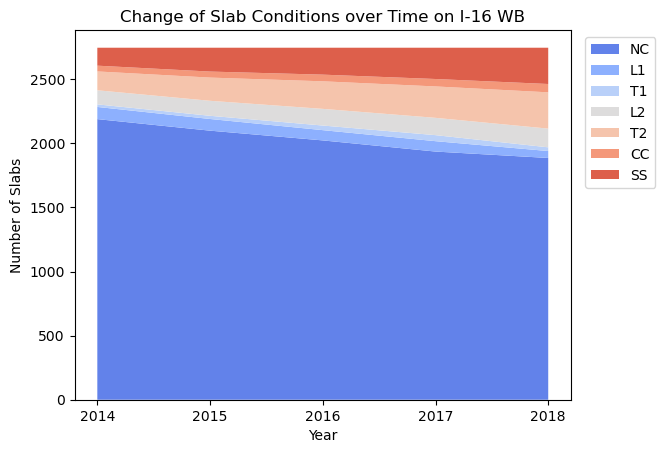

In [36]:
years = ['2014', '2015', '2016', '2017', '2018']
labels = ['NC', 'L1', 'T1', 'L2', 'T2', 'CC', 'SS']
colors = sns.color_palette('coolwarm', n_colors=7)
plt.stackplot(years, two_way_freq, labels=labels, colors=colors)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1))
plt.title('Change of Slab Conditions over Time on I-16 WB')
plt.xlabel('Year')
plt.ylabel('Number of Slabs')


Text(0, 0.5, 'Number of Slabs')

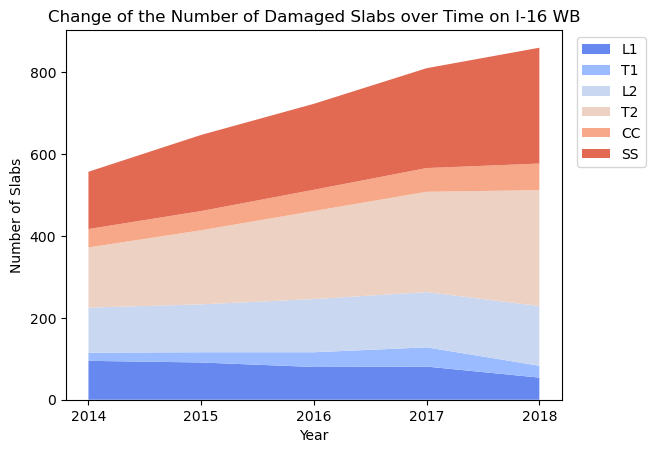

In [37]:
# Stacked area chart that only shows the slabs that were cracked.

two_way_freq_cracked = two_way_freq.copy()
two_way_freq_cracked = two_way_freq_cracked.drop(index='NC')
two_way_freq_cracked.head()

years = ['2014', '2015', '2016', '2017', '2018']
labels = ['L1', 'T1', 'L2', 'T2', 'CC', 'SS']
colors = sns.color_palette('coolwarm', n_colors=6)
plt.stackplot(years, two_way_freq_cracked, labels=labels, colors=colors)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1))
plt.title('Change of the Number of Damaged Slabs over Time on I-16 WB')
plt.xlabel('Year')
plt.ylabel('Number of Slabs')

,NC,L1,T1,L2,T2,CC,SS,Critically Damaged,Mildly Damaged,Δ NC,Δ Critically Damaged,Δ Mildly Damaged
2014,2189,95,20,110,147,45,140,442,115,NaN,NaN,NaN
2015,2099,91,25,117,181,47,186,531,116,-90.0,89.0,1.0
2016,2023,80,36,130,215,52,210,607,116,-76.0,76.0,0.0
2017,1936,81,47,135,245,58,244,682,128,-87.0,75.0,12.0
2018,1886,54,29,146,283,65,283,777,83,-50.0,95.0,-45.0


Text(0, 0.5, 'Number of Slabs')

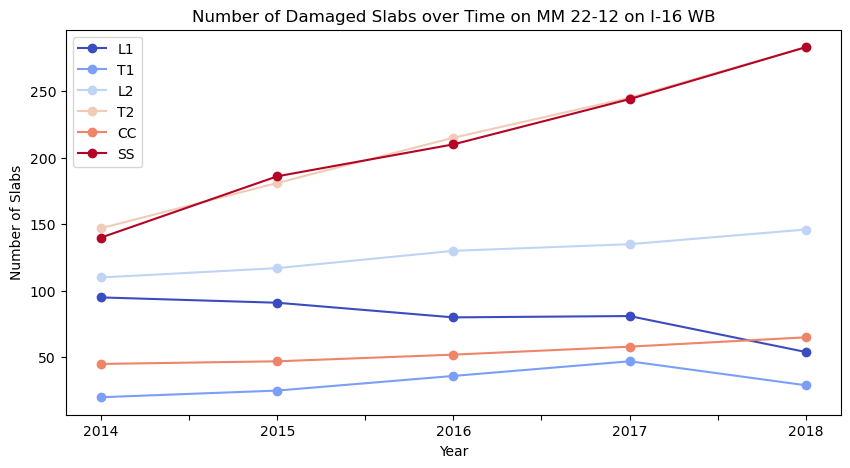

In [67]:
slab_table = two_way_freq.T
slab_table['Critically Damaged'] = slab_table[['T2', 'L2', 'SS', 'CC']].sum(axis=1)
slab_table['Mildly Damaged'] = slab_table[['T1', 'L1']].sum(axis=1)
slab_table[u'Δ NC'] = slab_table['NC'].diff()
slab_table[u'Δ Critically Damaged'] = slab_table['Critically Damaged'].diff()
slab_table[u'Δ Mildly Damaged'] = slab_table['Mildly Damaged'].diff()
display(slab_table)
slab_table.plot(use_index=True, y=['L1', 'T1', 'L2', 'T2', 'CC', 'SS'], figsize=(10, 5), colormap='coolwarm', marker='o')
plt.title('Number of Damaged Slabs over Time on MM 22-12 on I-16 WB')
plt.xlabel('Year')
plt.ylabel('Number of Slabs')

Text(0, 0.5, 'Change in Number of Slabs')

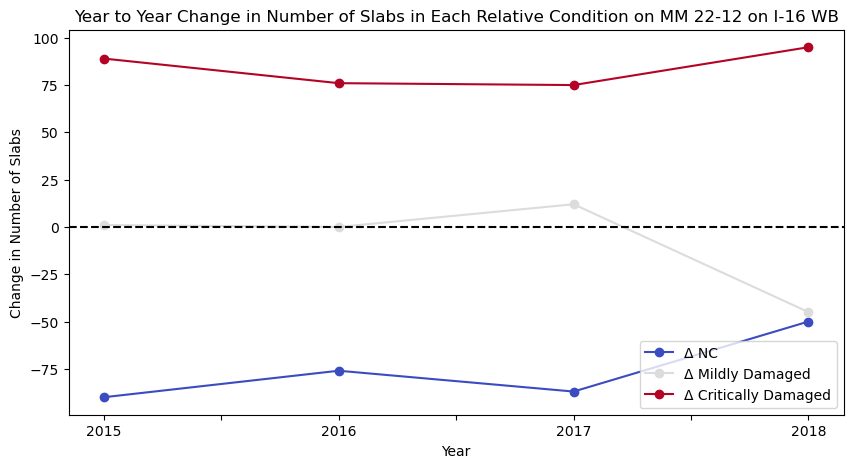

In [66]:
slab_table.plot(use_index=True, y=[u'Δ NC', u'Δ Mildly Damaged', u'Δ Critically Damaged'], figsize=(10, 5), colormap='coolwarm', marker='o')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Year to Year Change in Number of Slabs in Each Relative Condition on MM 22-12 on I-16 WB')
plt.xlabel('Year')
plt.ylabel('Change in Number of Slabs')